<p style="text-align:center; color:navy; font-size: 15px;">
  Created by <strong><em>Klissmann Anaclerio.</em></strong><br>
  Distribution without authorization is prohibited.
</p>

<p style="text-align:center; color: #2C3E50; font-size: 25px;">
  Datamining <span style="color:#E74C3C;">#3</span> News:
</p>

<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
The next step would be to scrape the PanamaAmerica website, specifically the political section, to collect 800 news articles. The data extracted includes the title, description, publication date, time, and author (if available). After collecting the data, it will be saved into a CSV file and later loaded into a MySQL database using Python. Finally, a word cloud will be generated based on the titles and descriptions of the news articles.
</p>


<p style="font-size: 16px; color: #dc3545; font-weight: bold; margin-bottom: 10px;">
  Warning:
</p>

<p style="font-size: 16px; color: #444; margin-bottom: 10px; line-height: 1.5;">
  This code must be used with RESPONSIBILITY and ETHICS. Using this code could lead to being banned from the website and may even be interpreted as a DDOS attack.
</p>


<p style="font-weight: bold; font-size: 16px;">System Information:</p>
<ul>
  <li>Windows 11 as the Operating System.</li>
  <li>csv file loaded into the MySQL 8.0.40 engine.</li>
  <li>Python 3.12</li>
</ul>

<p style="font-weight: bold; font-size: 15px;">Libraries for Python</p>

from scrapy.item import Field, Item

from scrapy.spiders import CrawlSpider, Rule

from scrapy.linkextractors import LinkExtractor

from scrapy.loader import ItemLoader

from scrapy.crawler import CrawlerProcess

from itemloaders.processors import MapCompose

<p style="font-weight: bold; font-size: 15px;">Code Python</p>

from scrapy.item import Field, Item

from scrapy.spiders import CrawlSpider, Rule

from scrapy.linkextractors import LinkExtractor

from scrapy.loader import ItemLoader

from scrapy.crawler import CrawlerProcess

from itemloaders.processors import MapCompose



class News(Item):

    title = Field()

    date_published = Field()

    by = Field()

    time = Field()

    description = Field()


class DetailNews(CrawlSpider):

    name = 'Panama_America'

    custom_settings = {

        'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',

        'FEED_FORMAT': 'csv',

        'FEED_URI': 'pananamerica_politica.csv',

        'CLOSESPIDER_PAGECOUNT': 800,

        'FEED_EXPORT_ENCODING': 'utf-8'

    }

    download_delay = 1

    allowed_domains = ['panamaamerica.com.pa']

    start_urls = ['https://www.panamaamerica.com.pa/politica']

    rules = (

        Rule(

            LinkExtractor(allow = r'page='),

            follow = True

        ),

        Rule(

            LinkExtractor(allow = r'politica/'),

            follow = True,

            callback="new_extractor"

        ),

    )

    def new_extractor(self,response):
        
        item= ItemLoader(News(), response)

        item.add_xpath('title', './/h1[@id="page-title"]/text()', 
                       MapCompose(lambda x: x.replace('\n', '').replace('\r', '').replace('\t', '').strip()) )

        item.add_xpath('date_published', './/div[@class="grid-x col s12 m12 l12"]/div[1]/text()',
                       MapCompose(lambda x: x.split(' ')[1].strip()))

        item.add_xpath('by', './/ul[@class="autor inline-list left "]/li[1]/text()', 
               MapCompose(
                         lambda x: x.split('/')[0].split('@')[0].split(':')[0].strip().rstrip(',')
                        ))

        item.add_xpath('time', '//div[@class="grid-x col s12 m12 l12"]/div[1]/text()',
                       MapCompose(lambda x: x.split(' ')[2].strip()))

        item.add_xpath('description', './/div[@class="large-12 medium-12 small-12 columns"]/p/text()', MapCompose(
            lambda x: x.replace('\n', '').replace('\r', '').replace('\t', '').strip()))


        yield item.load_item()


process = CrawlerProcess()

process.crawl(DetailNews)

process.start()


<p style="font-weight: bold; font-size: 15px;">Explanation:</p>
<p>In the provided Python code, the following steps are carried out:</p>

<ul>
    <li><strong>Defining the 'News' Item:</strong> The code begins by defining an item named 'News', which serves as a structure to hold the data scraped from the news website. It includes fields like 'title', 'date_published', 'by', 'time', and 'description'.</li>
    <li><strong>Setting up the Spider ('DetailNews'):</strong> The spider 'DetailNews' is responsible for crawling the politics section of the Panama América website. It starts from a specific URL and follows the links to gather news articles.</li>
    <li><strong>Configuring Custom Settings:</strong> The spider uses custom settings, such as:
        <ul>
            <li>User agent to mimic a browser and avoid detection.</li>
            <li>Export format and location for the data (CSV file named 'pananamerica_politica.csv').</li>
            <li>A limit on the number of pages to crawl (800 pages or 800 news).</li>
            <li>UTF-8 encoding to handle special characters.</li>
        </ul>
    </li>
    <li><strong>Defining Crawling Rules:</strong> Two rules guide the spider:
        <ul>
            <li>The first rule allows following pagination links (URLs containing 'page=').</li>
            <li>The second rule follows links containing 'politica/' and extracts news details using the 'new_extractor' callback.</li>
        </ul>
    </li>
    <li><strong>Extracting Data:</strong> The 'new_extractor' method uses XPath expressions to extract specific details from each news page:
        <ul>
            <li><strong>Title:</strong> Extracts and cleans the main headline of the article.</li>
            <li><strong>Date Published:</strong> Extracts the publication date from a specific HTML element.</li>
            <li><strong>By:</strong> Extracts the author or source of the news, removing unnecessary text.</li>
            <li><strong>Time:</strong> Extracts the publication time from the same element as the date.</li>
            <li><strong>Description:</strong> Extracts the main content or summary of the article.</li>
        </ul>
    </li>
    <li><strong>Processing the Data:</strong> The extracted data is processed and stored in the 'News' item, ensuring it is clean and formatted before saving it.</li>
    <li><strong>Crawler Process:</strong> The crawler is started using 'CrawlerProcess', which executes the spider and stores the data in the specified CSV file.</li>
</ul>


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
The next step would be to create a table in the database to include all the information collected from the website
</p>

<div style="background-color: #f9f9f9; padding: 15px; border-radius: 8px; font-family: 'Courier New', monospace; border: 1px solid #ddd;">
    <pre><code style="color: darkblue; font-size: 16px;">
CREATE TABLE news (
    `by` VARCHAR(255) DEFAULT NULL,         -- Author of the news (can be NULL)
    date_published DATE,                    -- Publication date
    description TEXT DEFAULT NULL,          -- Description of the news (can be NULL)
    time TIME,                              -- Time of the news (in 24-hour format)
    title TEXT                              -- Title of the news
);
</code></pre>
</div>

<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;"> Its Time to insert the data from pananamerica_politica.csv into a MySQL database using Python. </p>

In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error


csv_file = 'pananamerica_politica.csv'
df = pd.read_csv(csv_file)

credentials = {}
with open('key.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        credentials[key] = value


try:
    connection = mysql.connector.connect(
    host=credentials['host'],
    user=credentials['user'],
    password=credentials['password'],
    database=credentials['database']
    )

    if connection.is_connected():
        print("Successfully connected to the database.")

        cursor = connection.cursor()

        for index, row in df.iterrows():
            title = row['title']
            description = row['description'] if pd.notna(row['description']) else None
            date_published = row['date_published']
            by = row['by'] if pd.notna(row['by']) else None
            time = row['time']

            query = """
            INSERT INTO news (title, description, date_published, `by`, time)
            VALUES (%s, %s, %s, %s, %s)
            """
            values = (title, description, date_published, by, time)

    
            cursor.execute(query, values)

        connection.commit()
        print("Data successfully inserted into the database.")

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("Connection closed.")


Successfully connected to the database.
Data successfully inserted into the database.
Connection closed.


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
Explanation:
</p>

<p style="font-size: 14px; color: #555;">
This Python code connects to a MySQL database and inserts data from a CSV file into the 'news' table. First, it reads the CSV file using the pandas library and stores the data in a DataFrame. Then, it establishes a connection to the MySQL database using the 'mysql.connector' library. For each row in the DataFrame, the code extracts the necessary values (title, description, date_published, by, and time) and prepares an SQL query to insert the data into the 'news' table. It handles missing values by checking if the description or author is missing and assigning 'None' where applicable. After executing the query for all rows, the changes are committed to the database. If any errors occur during the process, an error message is printed. Finally, the connection to the database is closed.
</p>


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
Let's make a word cloud with title
</p>

Successfully connected to the database.


C:\Users\PythonSQL\AppData\Local\Temp\ipykernel_784\3186086691.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


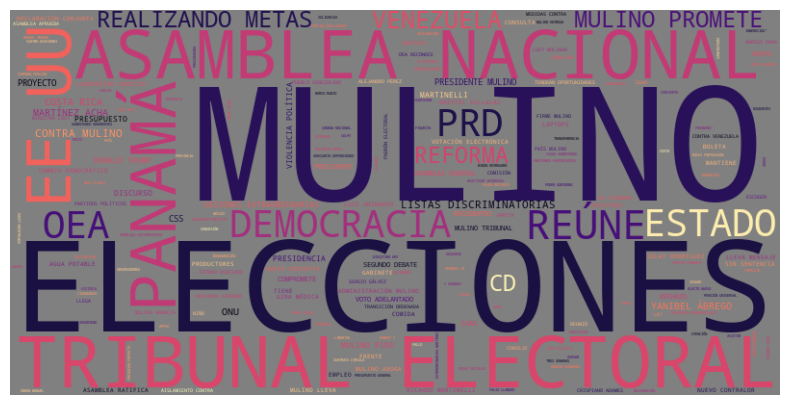

Connection closed.


In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words to exclude (stopwords)
custom_stopwords = set([
    'la', 'el', 'de', 'que', 'y', 'en', 'a', 'con', 'por', 'para', 
    'un', 'una', 'los', 'las', 'del', 'se', 'al', 'es', 'como', 'está', 
    'su', 'más', 'no', ',', 'sobre', 'ser', 'este', 'esta', 'un', 'entre', 
    'todo', 'hace', 'todos', 'muy', 'cuando', 'uno', 'esto', 'donde', 'hacer', ',', 'ser', 'le', 'reitera', 'cuestiona', 'raúl', 'José', 'sus', 'podría',
    'dos'
])


try:
    connection = mysql.connector.connect(
    host=credentials['host'],
    user=credentials['user'],
    password=credentials['password'],
    database=credentials['database']
    )

    if connection.is_connected():
        print("Successfully connected to the database.")


        query = "SELECT RTRIM(LTRIM(UPPER(title))) as title FROM news"
        df = pd.read_sql(query, connection)

 
        all_titles = ' '.join(df['title'].dropna())

      
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='grey',
            stopwords=set([word.upper() for word in custom_stopwords]), 
            colormap='magma',  
            contour_width=1,
            contour_color='black'
        ).generate(all_titles)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axes
        plt.show()

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    if connection.is_connected():
        connection.close()
        print("Connection closed.")


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
The following Python code connects to a MySQL database and generates a word cloud based on news titles.
</p>

<p style="font-size: 16px; color: #333;">
The script starts by importing necessary libraries such as <code>mysql.connector</code>, <code>pandas</code>, and <code>wordcloud</code>. It defines a set of custom stopwords in Spanish that will be excluded from the word cloud, such as common words like "la", "el", "y", etc. After establishing a connection to the MySQL database, it queries the <code>news</code> table to retrieve the titles of all news articles, converting them to uppercase for uniformity. The titles are then combined into a single string. Using the <code>WordCloud</code> library, the script generates a word cloud with a grey background and applies the custom stopwords (converted to uppercase) to exclude common words. Finally, the word cloud is displayed using <code>matplotlib</code> with a black contour around the image. The connection to the database is closed at the end of the script.
</p>


Successfully connected to the database.


C:\Users\PythonSQL\AppData\Local\Temp\ipykernel_784\1566862101.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


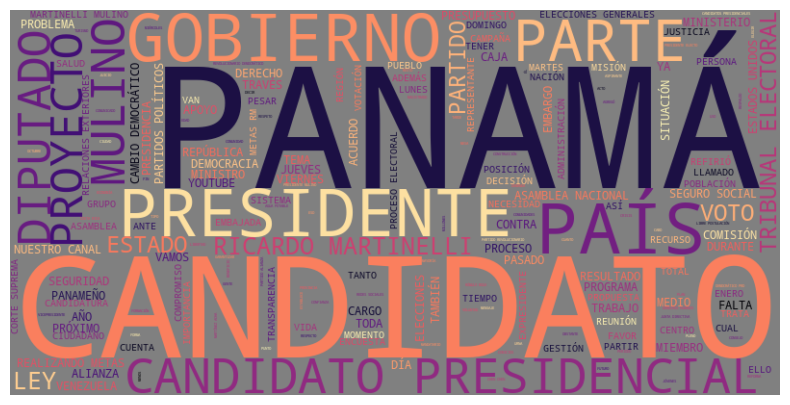

Connection closed.


In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


custom_stopwords = set([
    'la', 'el', 'de', 'que', 'y', 'en', 'a', 'con', 'por', 'para', 
    'un', 'una', 'los', 'las', 'del', 'se', 'al', 'es', 'como', 'está', 
    'su', 'más', 'no', ',', 'sobre', 'ser', 'este', 'esta', 'un', 'entre', 
    'todo', 'hace', 'todos', 'muy', 'cuando', 'uno', 'esto', 'donde', 'hacer', ',', 'ser', 'le', 'reitera', 'cuestiona', 'raúl', 'José', 'sus', 'podría',
    'dos', 'lo', 'dijo', 'expreso', 'tiene', 'agrego', 'quien', 'mi', 'si', 'no', 'sino', 'con', 'segun', 'caso', 'desde', 'pero', 'sin', 'luego', 'vez', 
    'porque', 'debido', 'hay', 'fue', 'otro', 'otros', 'mira', 'ha', 'son', 'estas', 'hasta', 'ellos', 'ni', 'ese', 'esa', 'va', 'mayo', 'junio', 'julio', 'nos', 'tras', 'eso'
    'ya', 'tienen', 'solo'
])

credentials = {}
with open('key.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        credentials[key] = value

try:
    connection = mysql.connector.connect(
        host=credentials['host'],
        user=credentials['user'],
        password=credentials['password'],
        database=credentials['database']
    )

    if connection.is_connected():
        print("Successfully connected to the database.")

       
        query = "SELECT RTRIM(LTRIM(UPPER(description))) as description FROM news"
        df = pd.read_sql(query, connection)

   
        all_titles = ' '.join(df['description'].dropna())


        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='grey',
            stopwords=set([word.upper() for word in custom_stopwords]),  # Exclude words in custom_stopwords
            colormap='magma',  # You can change the colormap for aesthetics
            contour_width=1,
            contour_color='black'
        ).generate(all_titles)


        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axes
        plt.show()

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    if connection.is_connected():
        connection.close()
        print("Connection closed.")


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
The following Python script connects to a MySQL database, retrieves the descriptions of news articles, and generates a word cloud excluding specific stopwords.
</p>

<p style="font-size: 16px; color: #333;">
This script begins by importing necessary libraries such as <code>mysql.connector</code>, <code>pandas</code>, and <code>wordcloud</code>, and defines a custom set of Spanish stopwords to exclude common words from the word cloud. It then establishes a connection to a MySQL database and queries the <code>news</code> table to retrieve the descriptions of articles, converting them to uppercase. The descriptions are concatenated into a single string. The <code>WordCloud</code> library is used to generate the word cloud, applying the custom stopwords, a grey background, and a "magma" colormap. The word cloud is displayed using <code>matplotlib</code>, with the axes hidden for a cleaner view. Finally, the database connection is closed after the word cloud is displayed.
</p>


<p style="text-align:center; color:navy; font-size: 15px;">
  Created by <strong><em>Klissmann Anaclerio.</em></strong><br>
  Distribution without authorization is prohibited.
</p>